KeyboardInterrupt: 

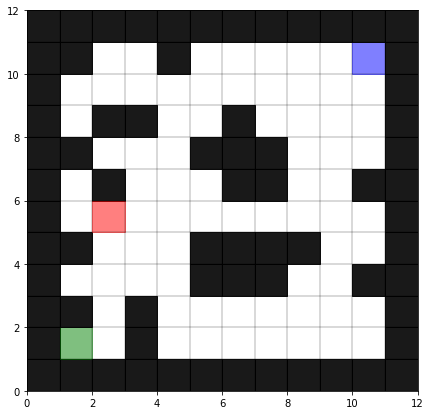

In [1]:
import matplotlib
import math
%matplotlib inline

import numpy as np
from map import Map
from agent import Agent

class q_learning(object):
    def __init__(self):
        self.map = Map()
        self.agent = Agent()
        #self.max_episode = 100
        self.max_episode = 50
        self.steps = 300
        self.gamma = 0.9
        self.alpha = 0.8
        self.q_table = np.random.uniform(low=-1,high=1,\
                                    size=(25856,self.agent.action_space))

    def decide_action(self,next_state,episode,q_table):
        first_probability = 0.75
        epsilon = first_probability * (1/(episode+1))
        if epsilon <= np.random.uniform(0,1):
            next_action = np.argmax(q_table[next_state])   
        else:
            prob = sum(q_table[next_state]+100) 
            w = (q_table[next_state]+100) / prob
            next_action = np.random.choice(range(4) ,p=w)  
        return next_action

    def update_Qtable(self,q_table,state,action,reward,next_state):
        next_max_q = max(q_table[next_state])
        q_table[state,action] = (1 - self.alpha) * q_table[state,action] \
                                + self.alpha * (reward + self.gamma * next_max_q)
        return q_table

    def reward(self,done,state,next_state):
        if done:
            reward = 100
        else:
            reward  = -(math.sqrt((self.map.goal_pos[0]-self.agent.pos[0])**2)+math.sqrt((self.map.goal_pos[1]-self.agent.pos[1])**2))    
        return reward


    def run(self):
        for episode in range(self.max_episode):
            self.agent = Agent(self.map.init_pos)
            state = self.agent.get_state(self.map.map)
            action = np.argmax(self.q_table[state]) 
            reward_of_episode = 0

            for i in range(self.steps):
                direction = self.map.chack_movable(self.agent.pos) 
                self.agent.action(action,direction)
                done = self.agent.check_done()
                next_state = self.agent.get_state(self.map.map)
                reward = self.reward(done,state,next_state) 
                reward_of_episode += reward
                self.q_table = self.update_Qtable(self.q_table,state,action,reward,next_state)
                action = self.decide_action(next_state,episode,self.q_table)
                state = next_state
                self.map.plot(self.agent.pos,self.q_table)
                if done:
                    break
            print("episode %5d, reward %6d, step %5d" %(episode+1,reward_of_episode,i+1))

if __name__ == "__main__":
   q_learning().run() 
